In [1449]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [1450]:
file_name = 'data/imported_data.csv'
df = pd.read_csv(file_name)

In [1451]:
df

X          Y         Z   R   G    B  Intensity  \
0      -13.693141  19.327297 -1.010548  62  20  214          4   
1      -13.690192  19.326153 -1.012546  62  20  214          4   
2      -13.688504  19.322510 -1.054509  62  20  214          6   
3      -13.685031  19.329977 -1.010620  62  20  214          3   
4      -13.682658  19.318302 -1.052479  62  20  214          8   
...           ...        ...       ...  ..  ..  ...        ...   
346928   9.440657  21.270155 -1.146209  31  32   37          6   
346929   9.455648  22.339735 -1.076674  44  42   45         18   
346930   9.427746  21.730379 -1.089457  40  40   40         22   
346931   9.436288  21.778114 -1.112198  34  32   33          8   
346932   9.431459  21.693707 -1.100925  38  32   34          7   

        Original_cloud_index  Illuminance_(PCV)  Classification        Nx  \
0                          2           0.898305             4.0  0.182153   
1                          2           0.898305             4.0  0.153613   
2                          2           0.783898             4.0 -0.131122   
3                          2           0.902542             4.0  0.154478   
4                          2           0.805085             4.0 -0.223175   
...                      ...                ...             ...       ...   
346928                     4           0.639831             NaN -0.925806   
346929                     4           0.944915             NaN -0.177199   
346930                     4           0.915254             NaN -0.698512   
346931                     4           0.830508             NaN -0.886486   
346932                     4           0.898305             NaN -0.991390   

              Ny        Nz  
0      -0.971910 -0.149035  
1      -0.986175 -0.062149  
2      -0.903758  0.407466  
3      -0.987513 -0.030896  
4      -0.725710  0.650798  
...          ...       ...  
346928 -0.059772 -0.373244  
346929 -0.112763  0.977694  
346930 -0.061930  0.712914  
346931  0.076302 -0.456422  
346932 -0.119513  0.053496  

[346933 rows x 13 columns]

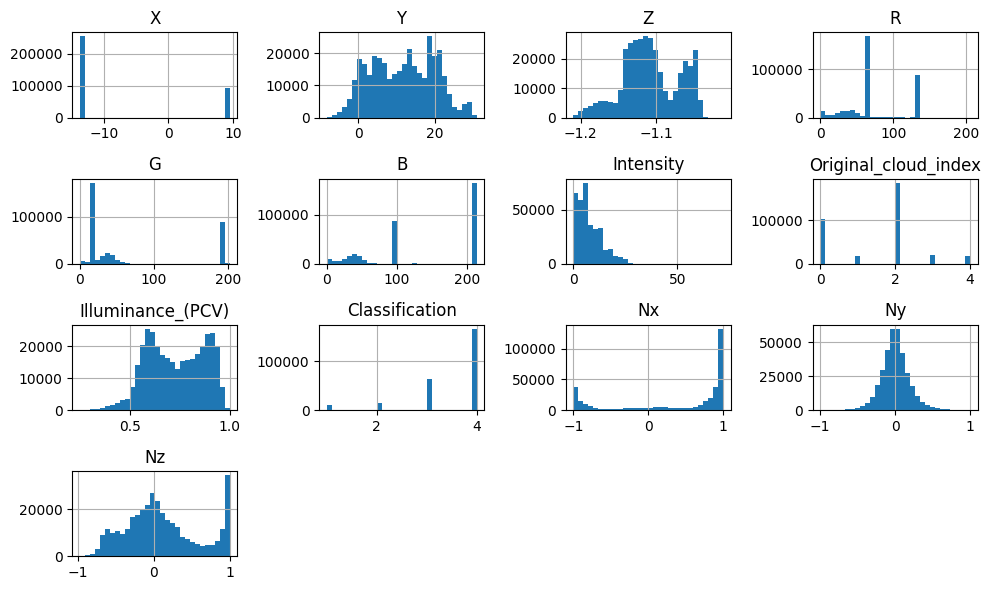

In [1452]:
# Histograms for each column
df.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [1453]:
# convert from meters to feet
df[['lateral', 'axial', 'vertical']] = df[['X', 'Y', 'Z']] * 3.28084

In [1454]:
df['vertical'] = df['vertical'] - df['vertical'].min() # set min to 0
df['axial'] = df['axial'] - df['axial'].min() # set min to 0

In [1455]:
df[['lateral_inch', 'axial_inch', 'vertical_inch']] = df[['lateral', 'axial', 'vertical']] * 12 # convert to inches

In [1456]:

df[['lateral_inch_round', 'axial_inch_round', 'vertical_inch_round']] = df[['lateral_inch', 'axial_inch', 'vertical_inch']].apply(
    lambda col: col.map(lambda x: round(x * 16) / 16)
)


In [1457]:
drop_cols = ['X', 'Y', 'Z', 'R', 'B', 'G', 'Nx', 'Ny', 'Nz']
df = df.drop(columns=drop_cols)

In [1458]:
df.drop(columns=['Illuminance_(PCV)'], inplace=True)

In [1459]:
df

Intensity  Original_cloud_index  Classification    lateral  \
0               4                     2             4.0 -44.925005   
1               4                     2             4.0 -44.915330   
2               6                     2             4.0 -44.909792   
3               3                     2             4.0 -44.898397   
4               8                     2             4.0 -44.890612   
...           ...                   ...             ...        ...   
346928          6                     4             NaN  30.973284   
346929         18                     4             NaN  31.022470   
346930         22                     4             NaN  30.930926   
346931          8                     4             NaN  30.958951   
346932          7                     4             NaN  30.943109   

             axial  vertical  lateral_inch   axial_inch  vertical_inch  \
0        90.213491  0.654076   -539.100056  1082.561896       7.848909   
1        90.209737  0.647520   -538.983963  1082.516840       7.770240   
2        90.197784  0.509847   -538.917506  1082.373414       6.118159   
3        90.222283  0.653840   -538.780763  1082.667401       7.846079   
4        90.183980  0.516509   -538.687348  1082.207759       6.198104   
...            ...       ...           ...          ...            ...   
346928   96.587697  0.208996    371.679408  1159.052360       2.507948   
346929  100.096818  0.437129    372.269635  1201.161814       5.245547   
346930   98.097618  0.395188    371.171107  1177.171422       4.742258   
346931   98.254230  0.320579    371.507409  1179.050761       3.846949   
346932   97.977302  0.357562    371.317312  1175.727619       4.290746   

        lateral_inch_round  axial_inch_round  vertical_inch_round  
0                -539.1250         1082.5625               7.8750  
1                -539.0000         1082.5000               7.7500  
2                -538.9375         1082.3750               6.1250  
3                -538.7500         1082.6875               7.8750  
4                -538.6875         1082.1875               6.1875  
...                    ...               ...                  ...  
346928            371.6875         1159.0625               2.5000  
346929            372.2500         1201.1875               5.2500  
346930            371.1875         1177.1875               4.7500  
346931            371.5000         1179.0625               3.8750  
346932            371.3125         1175.7500               4.3125  

[346933 rows x 12 columns]

In [1460]:
df.describe()

Intensity  Original_cloud_index  Classification        lateral  \
count  346933.000000         346933.000000   255141.000000  346933.000000   
mean        7.678693              1.519002        3.513834     -24.708635   
std         5.833132              1.130317        0.785351      33.397963   
min         0.000000              0.000000        1.000000     -44.925005   
25%         3.000000              0.000000        3.000000     -44.762070   
50%         6.000000              2.000000        4.000000     -44.732586   
75%        11.000000              2.000000        4.000000      30.918707   
max        72.000000              4.000000        4.000000      31.114301   

               axial       vertical   lateral_inch     axial_inch  \
count  346933.000000  346933.000000  346933.000000  346933.000000   
mean       64.550385       0.336548    -296.503618     774.604615   
std        27.058501       0.124188     400.775556     324.702010   
min         0.000000       0.000000    -539.100056       0.000000   
25%        41.161356       0.254556    -537.144836     493.936273   
50%        65.854903       0.325233    -536.791038     790.258831   
75%        87.628083       0.446572     371.024489    1051.536992   
max       127.864617       0.654076     373.371617    1534.375405   

       vertical_inch  lateral_inch_round  axial_inch_round  \
count  346933.000000       346933.000000     346933.000000   
mean        4.038573         -296.503675        774.604636   
std         1.490252          400.775594        324.702011   
min         0.000000         -539.125000          0.000000   
25%         3.054668         -537.125000        493.937500   
50%         3.902799         -536.812500        790.250000   
75%         5.358861          371.000000       1051.562500   
max         7.848909          373.375000       1534.375000   

       vertical_inch_round  
count        346933.000000  
mean              4.038601  
std               1.490366  
min               0.000000  
25%               3.062500  
50%               3.875000  
75%               5.375000  
max               7.875000

In [1461]:
floor_to_rail_top_nom = 25.5 # feet
floor_to_rail_top_nom_inch = floor_to_rail_top_nom * 12 # inches
span_nom = 75.75 # feet
span_nom_inch = span_nom * 12 # inches
rail_height = 5 # inches

In [1462]:
# Create binary flags
df['is_rail_a'] = (df['lateral'] < 0).astype(int)  # 1 if less than mean, else 0
df['is_rail_b'] = (df['lateral'] >= 0).astype(int) # 1 if greater than or equal to mean, else 0

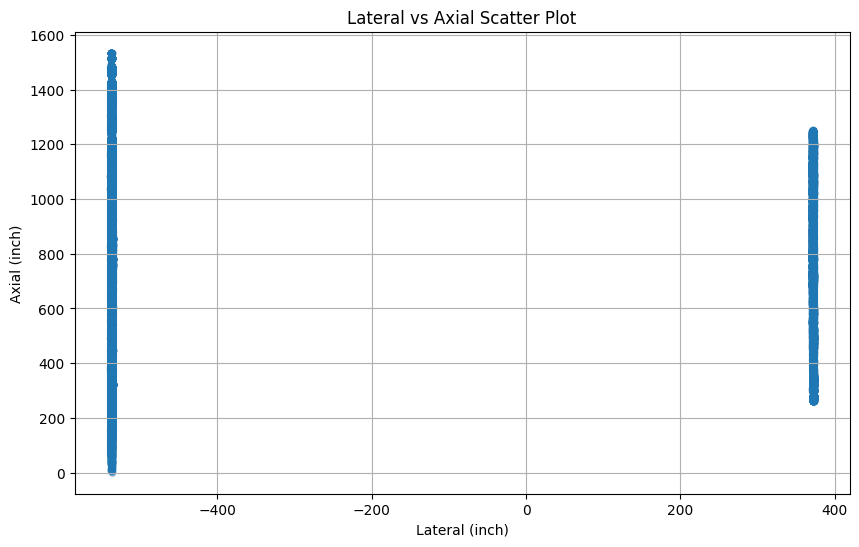

In [1463]:
scatter = df.plot.scatter(x='lateral_inch', y='axial_inch', alpha=0.1, figsize=(10, 6))
plt.title('Lateral vs Axial Scatter Plot')
plt.xlabel('Lateral (inch)')
plt.ylabel('Axial (inch)')
plt.grid(True)
plt.show()


In [1464]:

# Compute axial bounds for right rail
rmin, rmax = df.loc[df['is_rail_b'] == 1, 'axial_inch'].agg(['min', 'max'])

# Keep all non-left rows OR left rows within [rmin, rmax]
df = df[
    (df['is_rail_a'] == 0) | 
    df['axial_inch'].between(rmin, rmax, inclusive='both')
].copy()

print(f"Right rail axial range: [{rmin:.6f}, {rmax:.6f}]")
print(f"Rows after truncation: {len(df)}")

Right rail axial range: [260.230147, 1251.691235]
Rows after truncation: 313989


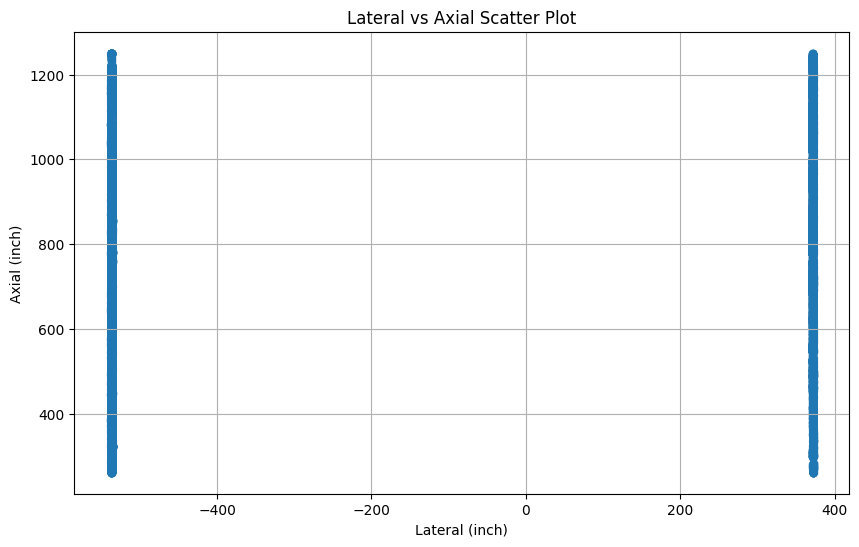

In [1465]:
scatter = df.plot.scatter(x='lateral_inch', y='axial_inch', alpha=0.1, figsize=(10, 6))
plt.title('Lateral vs Axial Scatter Plot')
plt.xlabel('Lateral (inch)')
plt.ylabel('Axial (inch)')
plt.grid(True)
plt.show()

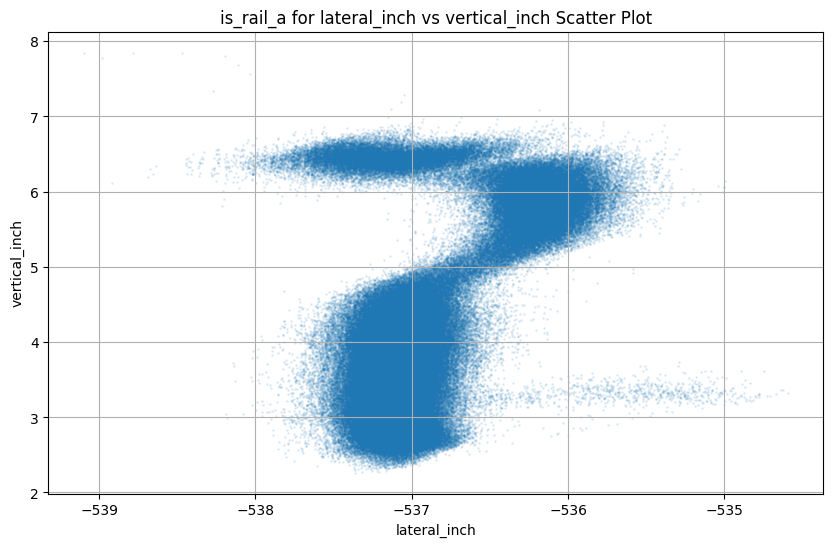

In [1466]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='lateral_inch', y='vertical_inch', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_a for lateral_inch vs vertical_inch Scatter Plot')
plt.xlabel('lateral_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

In [1467]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='axial_inch', y='vertical_inch', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_a for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

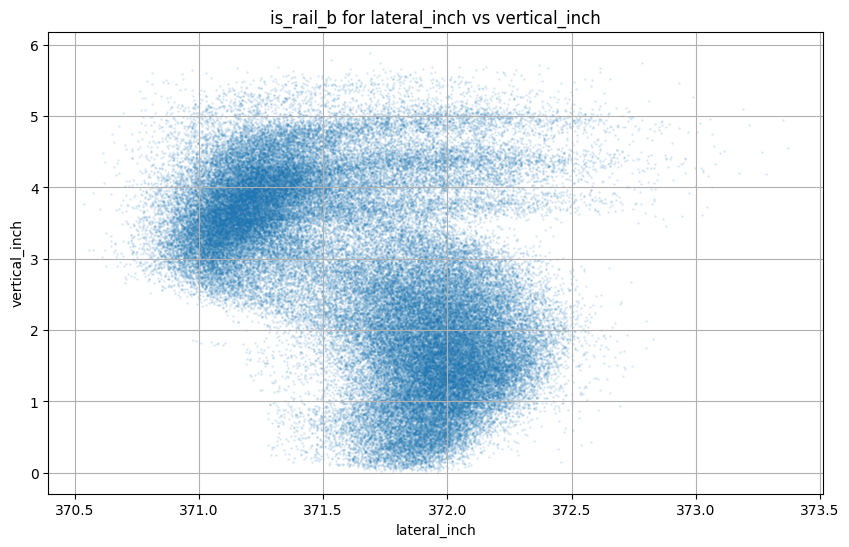

In [1468]:
scatter = df[df['is_rail_b']==1].plot.scatter(x='lateral_inch', y='vertical_inch', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for lateral_inch vs vertical_inch')
plt.xlabel('lateral_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

In [1469]:
scatter = df[df['is_rail_b']==1].plot.scatter(x='axial_inch', y='vertical_inch', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs vertical_inch')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

In [1470]:
import numpy as np
import pandas as pd

# =========================
# Tunable parameters
# =========================
crown_band_in   = 0.35     # half-width of lateral crown band (in)
window_in       = 12.0    # axial window length for rolling quantile (in) ~ 10 ft
step_in         = 6.0     # stride between window centers (in)
q_top           = 0.99     # robust "top" inside the window (99th percentile)
min_pts_window  = 5       # require at least this many points in a window to accept it
smooth_win      = 7        # odd number; rolling-median smooth on the q99 curve

# Masks & lateral centers
maskL = df['is_rail_a'] == 1
maskR = df['is_rail_b'] == 1
if not maskL.any() or not maskR.any():
    raise ValueError("Need is_rail_a / is_rail_b flags precomputed.")

cenL = df.loc[maskL, 'lateral_inch'].median()
cenR = df.loc[maskR, 'lateral_inch'].median()

axmin, axmax = df['axial_inch'].min(), df['axial_inch'].max()
centers = np.arange(axmin + window_in/2, axmax - window_in/2 + 1e-9, step_in)

def rolling_top_curve(df, rail_mask, lateral_center):
    rows = []
    for cx in centers:
        wmask = (
            rail_mask
            & (df['axial_inch'] >= cx - window_in/2)
            & (df['axial_inch'] <  cx + window_in/2)
            & (np.abs(df['lateral_inch'] - lateral_center) <= crown_band_in)
        )
        if wmask.sum() < min_pts_window:
            continue
        qv = df.loc[wmask, 'vertical_inch'].quantile(q_top)
        rows.append((cx, qv))
    curve = pd.DataFrame(rows, columns=['cx', 'q'])
    if curve.empty:
        return curve
    # Smooth the top curve to reduce jitter from sampling
    if len(curve) >= smooth_win:
        curve['q_s'] = curve['q'].rolling(smooth_win, min_periods=1, center=True).median()
    else:
        curve['q_s'] = curve['q']
    return curve

# Build per-rail rolling top curves
curveL = rolling_top_curve(df, maskL, cenL)
curveR = rolling_top_curve(df, maskR, cenR)
if curveL.empty or curveR.empty:
    raise ValueError("Top curve could not be computed for one or both rails. Relax band, window, or min_pts_window.")

# Interpolate the reference (q99_smooth) to each point on its rail
refL = np.interp(df.loc[maskL, 'axial_inch'], curveL['cx'], curveL['q_s'])
refR = np.interp(df.loc[maskR, 'axial_inch'], curveR['cx'], curveR['q_s'])

# Create relative vertical by subtracting the local top curve (per rail)
df['vertical_inch_rel'] = df['vertical_inch']
df.loc[maskL, 'vertical_inch_rel'] -= refL
df.loc[maskR, 'vertical_inch_rel'] -= refR

# (Optional) For non-rail points, subtract the average of both rail top curves at that axial
if (~(maskL | maskR)).any():
    # Interpolate both curves across all rows
    all_refL = np.interp(df['axial_inch'], curveL['cx'], curveL['q_s'])
    all_refR = np.interp(df['axial_inch'], curveR['cx'], curveR['q_s'])
    avg_ref = 0.5 * (all_refL + all_refR)
    df.loc[~(maskL | maskR), 'vertical_inch_rel'] = df.loc[~(maskL | maskR), 'vertical_inch'] - avg_ref

# Diagnostics: 99th percentile should be ~0 in crown bands
def residual_q(mask, center):
    use = mask & (np.abs(df['lateral_inch'] - center) <= crown_band_in)
    if use.sum() == 0:
        return np.nan
    return float(df.loc[use, 'vertical_inch_rel'].quantile(0.99))

rqL = residual_q(maskL, cenL)
rqR = residual_q(maskR, cenR)
print(f"Residual q{int(q_top*100)} in crown — left: {rqL:+.4f} in, right: {rqR:+.4f} in (should be near 0)")


Residual q99 in crown — left: +0.0048 in, right: +0.0048 in (should be near 0)


In [1471]:
df

Intensity  Original_cloud_index  Classification    lateral  \
0               4                     2             4.0 -44.925005   
1               4                     2             4.0 -44.915330   
2               6                     2             4.0 -44.909792   
3               3                     2             4.0 -44.898397   
4               8                     2             4.0 -44.890612   
...           ...                   ...             ...        ...   
346928          6                     4             NaN  30.973284   
346929         18                     4             NaN  31.022470   
346930         22                     4             NaN  30.930926   
346931          8                     4             NaN  30.958951   
346932          7                     4             NaN  30.943109   

             axial  vertical  lateral_inch   axial_inch  vertical_inch  \
0        90.213491  0.654076   -539.100056  1082.561896       7.848909   
1        90.209737  0.647520   -538.983963  1082.516840       7.770240   
2        90.197784  0.509847   -538.917506  1082.373414       6.118159   
3        90.222283  0.653840   -538.780763  1082.667401       7.846079   
4        90.183980  0.516509   -538.687348  1082.207759       6.198104   
...            ...       ...           ...          ...            ...   
346928   96.587697  0.208996    371.679408  1159.052360       2.507948   
346929  100.096818  0.437129    372.269635  1201.161814       5.245547   
346930   98.097618  0.395188    371.171107  1177.171422       4.742258   
346931   98.254230  0.320579    371.507409  1179.050761       3.846949   
346932   97.977302  0.357562    371.317312  1175.727619       4.290746   

        lateral_inch_round  axial_inch_round  vertical_inch_round  is_rail_a  \
0                -539.1250         1082.5625               7.8750          1   
1                -539.0000         1082.5000               7.7500          1   
2                -538.9375         1082.3750               6.1250          1   
3                -538.7500         1082.6875               7.8750          1   
4                -538.6875         1082.1875               6.1875          1   
...                    ...               ...                  ...        ...   
346928            371.6875         1159.0625               2.5000          0   
346929            372.2500         1201.1875               5.2500          0   
346930            371.1875         1177.1875               4.7500          0   
346931            371.5000         1179.0625               3.8750          0   
346932            371.3125         1175.7500               4.3125          0   

        is_rail_b  vertical_inch_rel  
0               0           1.314941  
1               0           1.236068  
2               0          -0.416661  
3               0           1.312587  
4               0          -0.337388  
...           ...                ...  
346928          1          -2.528359  
346929          1          -0.156261  
346930          1          -0.431264  
346931          1          -1.348162  
346932          1          -0.871683  

[313989 rows x 15 columns]

In [1472]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='lateral_inch', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_a for lateral_inch vs vertical_inch Scatter Plot')
plt.xlabel('lateral_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

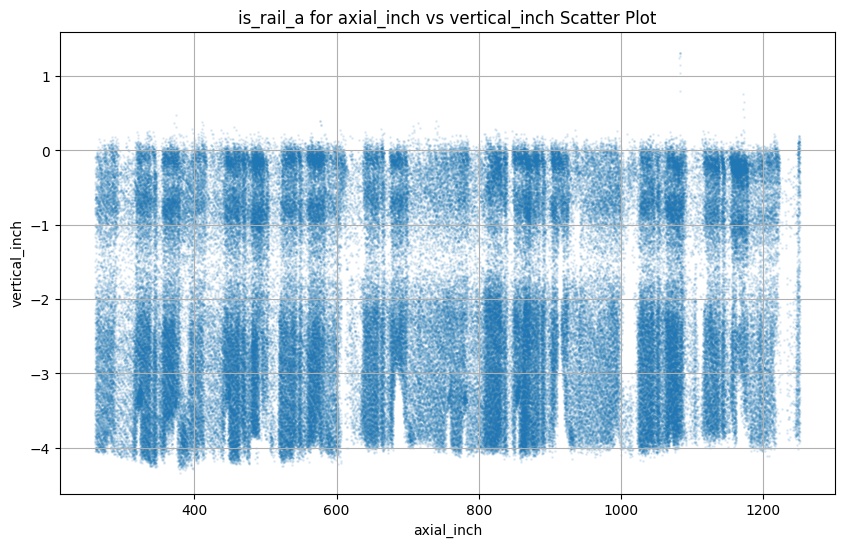

In [1473]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='axial_inch', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_a for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

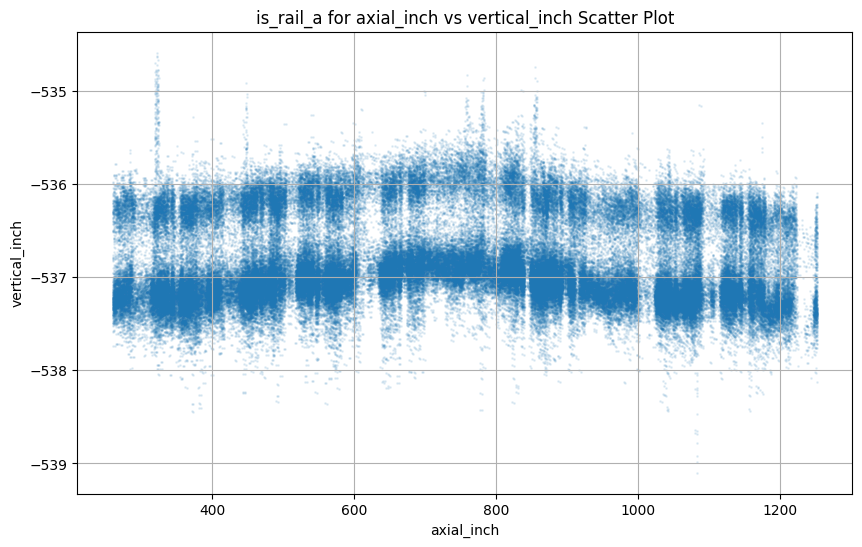

In [1474]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='axial_inch', y='lateral_inch', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_a for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

In [1475]:
df

Intensity  Original_cloud_index  Classification    lateral  \
0               4                     2             4.0 -44.925005   
1               4                     2             4.0 -44.915330   
2               6                     2             4.0 -44.909792   
3               3                     2             4.0 -44.898397   
4               8                     2             4.0 -44.890612   
...           ...                   ...             ...        ...   
346928          6                     4             NaN  30.973284   
346929         18                     4             NaN  31.022470   
346930         22                     4             NaN  30.930926   
346931          8                     4             NaN  30.958951   
346932          7                     4             NaN  30.943109   

             axial  vertical  lateral_inch   axial_inch  vertical_inch  \
0        90.213491  0.654076   -539.100056  1082.561896       7.848909   
1        90.209737  0.647520   -538.983963  1082.516840       7.770240   
2        90.197784  0.509847   -538.917506  1082.373414       6.118159   
3        90.222283  0.653840   -538.780763  1082.667401       7.846079   
4        90.183980  0.516509   -538.687348  1082.207759       6.198104   
...            ...       ...           ...          ...            ...   
346928   96.587697  0.208996    371.679408  1159.052360       2.507948   
346929  100.096818  0.437129    372.269635  1201.161814       5.245547   
346930   98.097618  0.395188    371.171107  1177.171422       4.742258   
346931   98.254230  0.320579    371.507409  1179.050761       3.846949   
346932   97.977302  0.357562    371.317312  1175.727619       4.290746   

        lateral_inch_round  axial_inch_round  vertical_inch_round  is_rail_a  \
0                -539.1250         1082.5625               7.8750          1   
1                -539.0000         1082.5000               7.7500          1   
2                -538.9375         1082.3750               6.1250          1   
3                -538.7500         1082.6875               7.8750          1   
4                -538.6875         1082.1875               6.1875          1   
...                    ...               ...                  ...        ...   
346928            371.6875         1159.0625               2.5000          0   
346929            372.2500         1201.1875               5.2500          0   
346930            371.1875         1177.1875               4.7500          0   
346931            371.5000         1179.0625               3.8750          0   
346932            371.3125         1175.7500               4.3125          0   

        is_rail_b  vertical_inch_rel  
0               0           1.314941  
1               0           1.236068  
2               0          -0.416661  
3               0           1.312587  
4               0          -0.337388  
...           ...                ...  
346928          1          -2.528359  
346929          1          -0.156261  
346930          1          -0.431264  
346931          1          -1.348162  
346932          1          -0.871683  

[313989 rows x 15 columns]

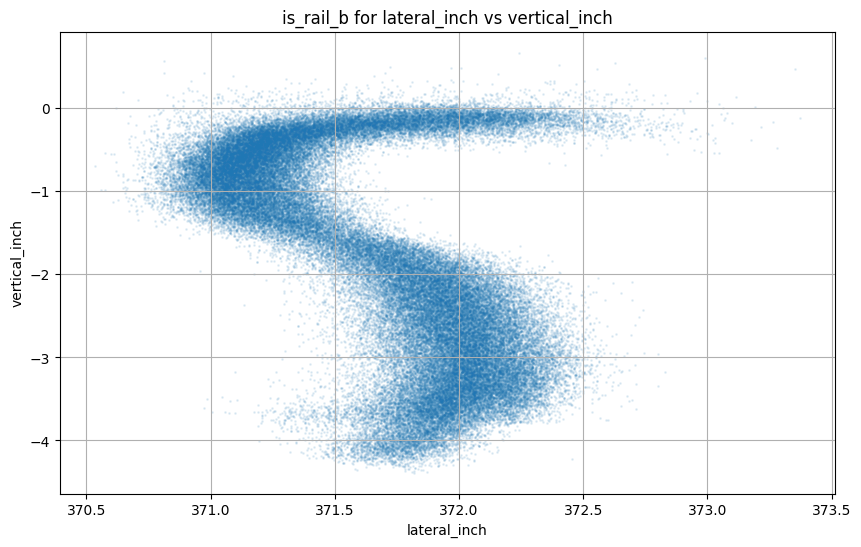

In [1476]:
scatter = df[df['is_rail_b']==1].plot.scatter(x='lateral_inch', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for lateral_inch vs vertical_inch')
plt.xlabel('lateral_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

In [1477]:
scatter = df[df['is_rail_b']==1].plot.scatter(x='axial_inch', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs vertical_inch_rel')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch_rel')
plt.grid(True)
plt.show()

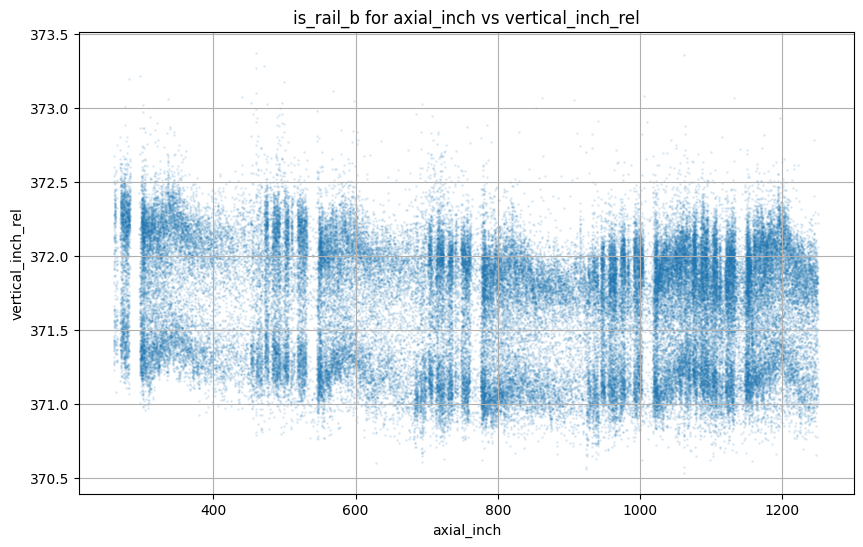

In [1478]:
scatter = df[df['is_rail_b']==1].plot.scatter(x='axial_inch', y='lateral_inch', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs vertical_inch_rel')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch_rel')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# =========================
# Tunable parameters
# =========================
side_band_in   = 0.25     # half-width of band (in)
window_in       = 12.0    # axial window length for rolling quantile (in) ~ 10 ft
step_in         = 6.0     # stride between window centers (in)
q_top           = 0.99     # robust "top" inside the window (99th percentile)
min_pts_window  = 5       # require at least this many points in a window to accept it
smooth_win      = 7        # odd number; rolling-median smooth on the q99 curve

# Masks & lateral centers
maskL = df['is_rail_a'] == 1
maskR = df['is_rail_b'] == 1

cenL = df.loc[maskL, 'vertical_inch_rel'].median()
cenR = df.loc[maskR, 'vertical_inch_rel'].median()

axmin, axmax = df['axial_inch'].min(), df['axial_inch'].max()
centers = np.arange(axmin + window_in/2, axmax - window_in/2 + 1e-9, step_in)

def rolling_top_curve(df, rail_mask, lateral_center):
    rows = []
    for cx in centers:
        wmask = (
            rail_mask
            & (df['axial_inch'] >= cx - window_in/2)
            & (df['axial_inch'] <  cx + window_in/2)
            & (np.abs(df['vertical_inch_rel'] - lateral_center) <= side_band_in)
        )
        if wmask.sum() < min_pts_window:
            continue
        qv = df.loc[wmask, 'lateral_inch'].quantile(q_top)
        rows.append((cx, qv))
    curve = pd.DataFrame(rows, columns=['cx', 'q'])
    if curve.empty:
        return curve
    # Smooth the top curve to reduce jitter from sampling
    if len(curve) >= smooth_win:
        curve['q_s'] = curve['q'].rolling(smooth_win, min_periods=1, center=True).median()
    else:
        curve['q_s'] = curve['q']
    return curve

# Build per-rail rolling top curves
curveL = rolling_top_curve(df, maskL, cenL)
curveR = rolling_top_curve(df, maskR, cenR)
if curveL.empty or curveR.empty:
    raise ValueError("Top curve could not be computed for one or both rails. Relax band, window, or min_pts_window.")

# Interpolate the reference (q99_smooth) to each point on its rail
refL = np.interp(df.loc[maskL, 'axial_inch'], curveL['cx'], curveL['q_s'])
refR = np.interp(df.loc[maskR, 'axial_inch'], curveR['cx'], curveR['q_s'])

# Create relative vertical by subtracting the local top curve (per rail)
df['lateral_inch_rel'] = df['lateral_inch']
df.loc[maskL, 'lateral_inch_rel'] -= refL
df.loc[maskR, 'lateral_inch_rel'] -= refR

# (Optional) For non-rail points, subtract the average of both rail top curves at that axial
if (~(maskL | maskR)).any():
    # Interpolate both curves across all rows
    all_refL = np.interp(df['axial_inch'], curveL['cx'], curveL['q_s'])
    all_refR = np.interp(df['axial_inch'], curveR['cx'], curveR['q_s'])
    avg_ref = 0.5 * (all_refL + all_refR)
    df.loc[~(maskL | maskR), 'lateral_inch_rel'] = df.loc[~(maskL | maskR), 'lateral_inch'] - avg_ref

# Diagnostics: 99th percentile should be ~0 in crown bands
def residual_q(mask, center):
    use = mask & (np.abs(df['vertical_inch_rel'] - center) <= side_band_in)
    if use.sum() == 0:
        return np.nan
    return float(df.loc[use, 'lateral_inch_rel'].quantile(0.99))

rqL = residual_q(maskL, cenL)
rqR = residual_q(maskR, cenR)
print(f"Residual q{int(q_top*100)} in crown — left: {rqL:+.4f} in, right: {rqR:+.4f} in (should be near 0)")


Residual q99 in crown — left: +0.0222 in, right: +0.0262 in (should be near 0)


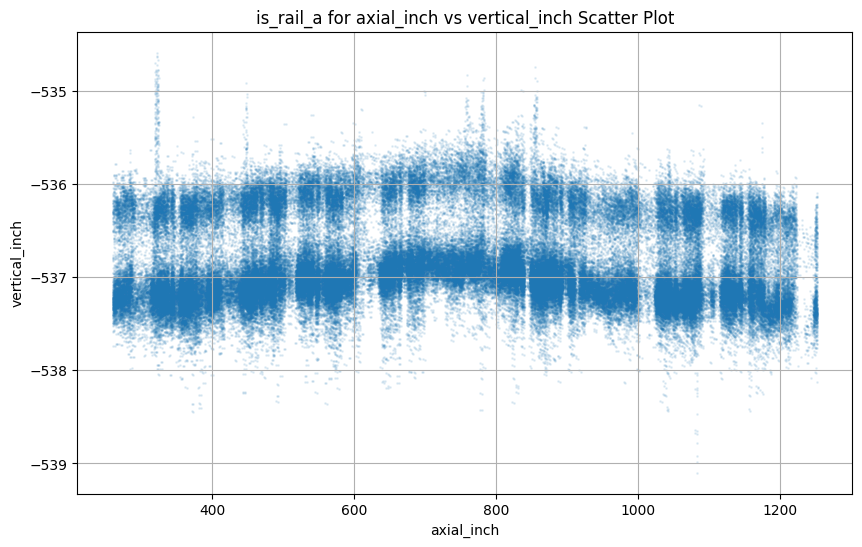

In [ ]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='axial_inch', y='lateral_inch', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_a for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

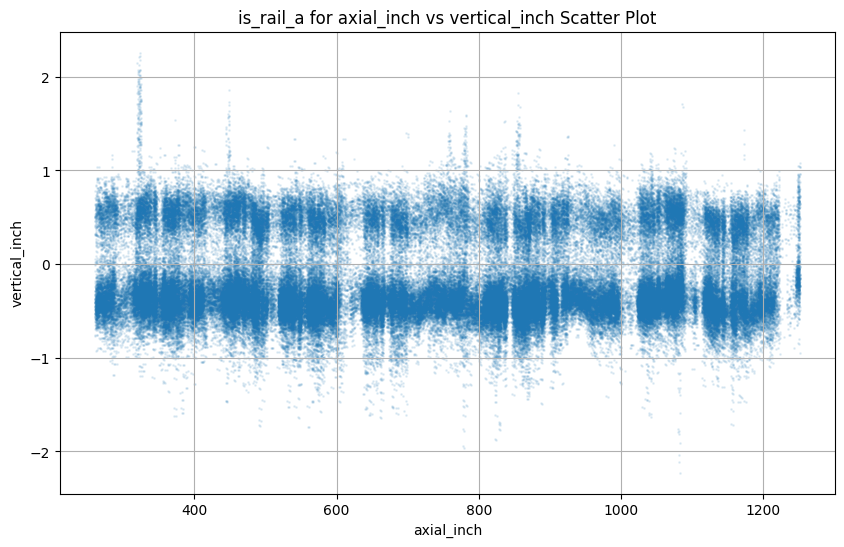

In [1482]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='axial_inch', y='lateral_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_a for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

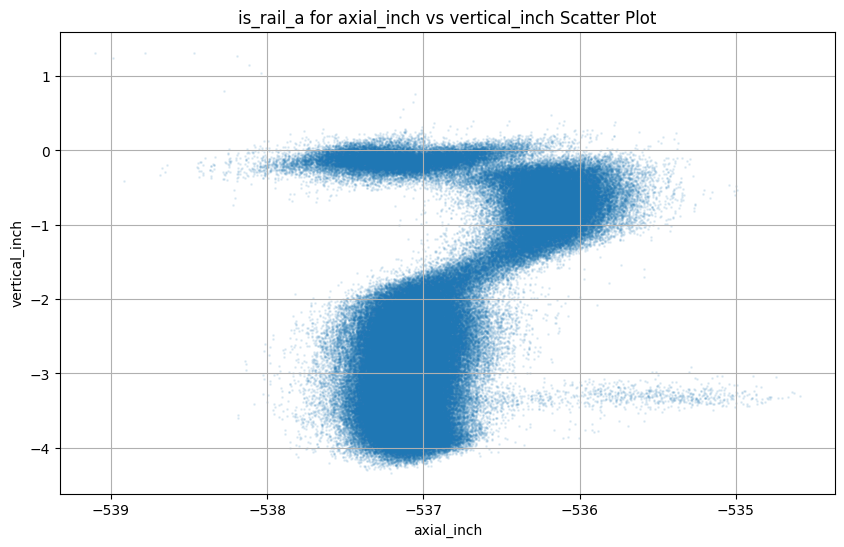

In [1483]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='lateral_inch', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_a for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

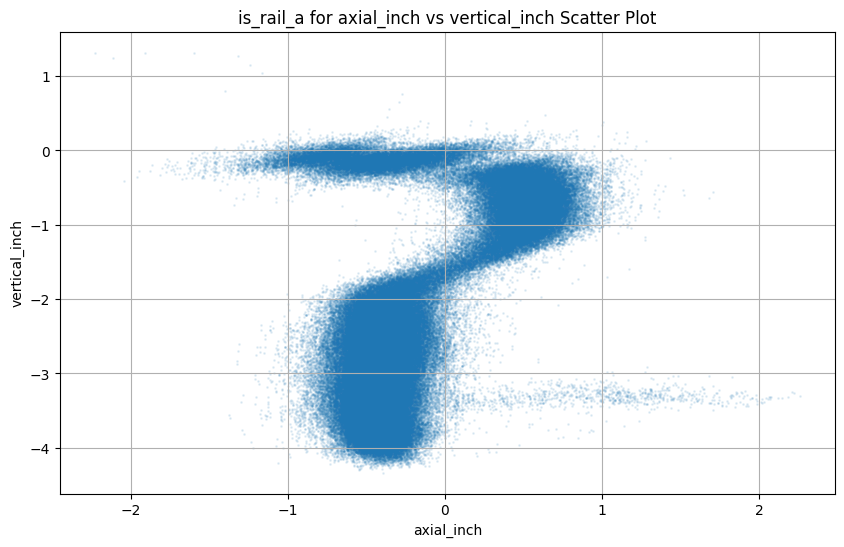

In [1484]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='lateral_inch_rel', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_a for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

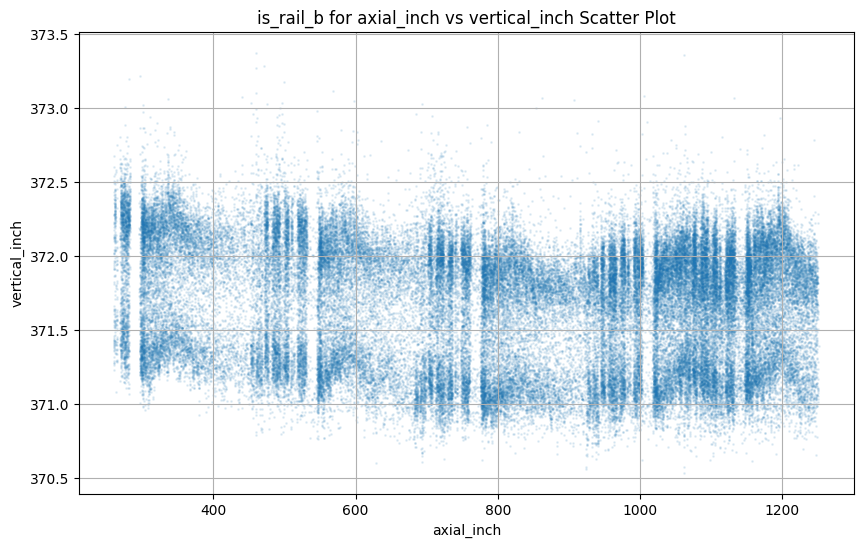

In [1485]:
scatter = df[df['is_rail_b']==1].plot.scatter(x='axial_inch', y='lateral_inch', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

In [1488]:
scatter = df[df['is_rail_b'] == 1].plot.scatter(x='axial_inch', y='lateral_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs lateral_inch_rel Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('lateral_inch_rel')
plt.grid(True)
plt.show()

In [1490]:
scatter = df[df['is_rail_b'] == 1].plot.scatter(x='lateral_inch', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs lateral_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('lateral_inch')
plt.grid(True)
plt.show()

In [1492]:
scatter = df[df['is_rail_b'] == 1].plot.scatter(x='lateral_inch_rel', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs lateral_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('lateral_inch')
plt.grid(True)
plt.show()

In [1514]:

def duplicate_shift(df, shift_in=1.0, axial_col='axial_inch'):
    """
    Duplicate all rows, shift axial by shift_in, and flag as synthetic.
    """
    dup = df.copy()
    dup[axial_col] = dup[axial_col] + shift_in
    dup['is_synth'] = 1
    return pd.concat([df, dup], ignore_index=True)

# Example usage:
df_aug = duplicate_shift(df, shift_in=6.0)


In [1512]:
df_aug

Intensity  Original_cloud_index  Classification    lateral  \
0               4                     2             4.0 -44.925005   
1               4                     2             4.0 -44.915330   
2               6                     2             4.0 -44.909792   
3               3                     2             4.0 -44.898397   
4               8                     2             4.0 -44.890612   
...           ...                   ...             ...        ...   
627973          6                     4             NaN  30.973284   
627974         18                     4             NaN  31.022470   
627975         22                     4             NaN  30.930926   
627976          8                     4             NaN  30.958951   
627977          7                     4             NaN  30.943109   

             axial  vertical  lateral_inch   axial_inch  vertical_inch  \
0        90.213491  0.654076   -539.100056  1082.561896       7.848909   
1        90.209737  0.647520   -538.983963  1082.516840       7.770240   
2        90.197784  0.509847   -538.917506  1082.373414       6.118159   
3        90.222283  0.653840   -538.780763  1082.667401       7.846079   
4        90.183980  0.516509   -538.687348  1082.207759       6.198104   
...            ...       ...           ...          ...            ...   
627973   96.587697  0.208996    371.679408  1162.052360       2.507948   
627974  100.096818  0.437129    372.269635  1204.161814       5.245547   
627975   98.097618  0.395188    371.171107  1180.171422       4.742258   
627976   98.254230  0.320579    371.507409  1182.050761       3.846949   
627977   97.977302  0.357562    371.317312  1178.727619       4.290746   

        lateral_inch_round  axial_inch_round  vertical_inch_round  is_rail_a  \
0                -539.1250         1082.5625               7.8750          1   
1                -539.0000         1082.5000               7.7500          1   
2                -538.9375         1082.3750               6.1250          1   
3                -538.7500         1082.6875               7.8750          1   
4                -538.6875         1082.1875               6.1875          1   
...                    ...               ...                  ...        ...   
627973            371.6875         1159.0625               2.5000          0   
627974            372.2500         1201.1875               5.2500          0   
627975            371.1875         1177.1875               4.7500          0   
627976            371.5000         1179.0625               3.8750          0   
627977            371.3125         1175.7500               4.3125          0   

        is_rail_b  vertical_inch_rel  lateral_inch_rel  is_synth  
0               0           1.314941         -2.226690       NaN  
1               0           1.236068         -2.110363       NaN  
2               0          -0.416661         -2.043162       NaN  
3               0           1.312587         -1.907945       NaN  
4               0          -0.337388         -1.812259       NaN  
...           ...                ...               ...       ...  
627973          1          -2.528359         -0.378001       1.0  
627974          1          -0.156261          0.102195       1.0  
627975          1          -0.431264         -0.967988       1.0  
627976          1          -1.348162         -0.640798       1.0  
627977          1          -0.871683         -0.810322       1.0  

[627978 rows x 17 columns]

In [ ]:
scatter = df[df['is_rail_b']==1].plot.scatter(x='lateral_inch_rel', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

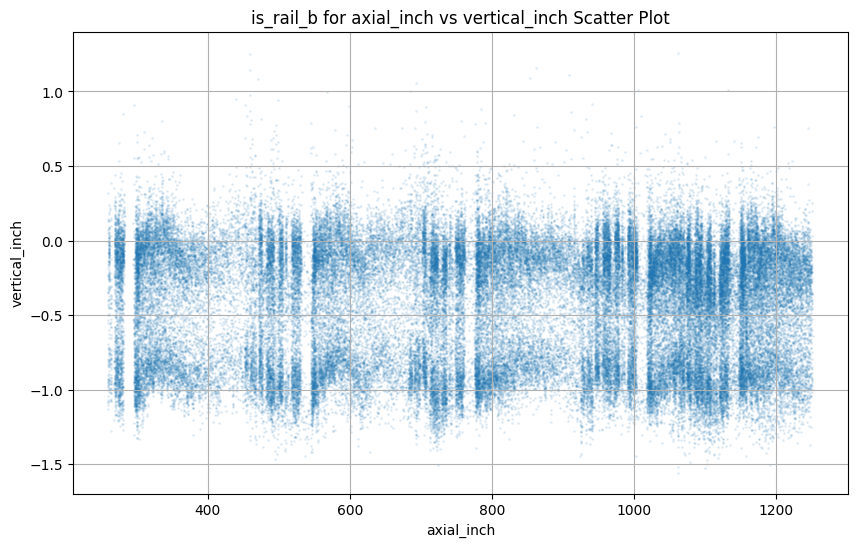

In [1518]:
scatter = df[df['is_rail_b']==1].plot.scatter(x='axial_inch', y='lateral_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

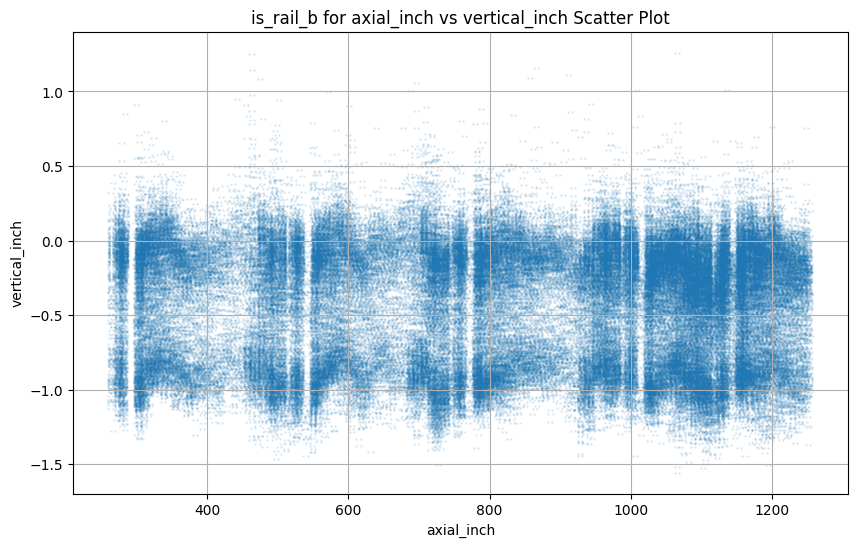

In [1517]:
scatter = df_aug[df_aug['is_rail_b']==1].plot.scatter(y='lateral_inch_rel', x='axial_inch', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

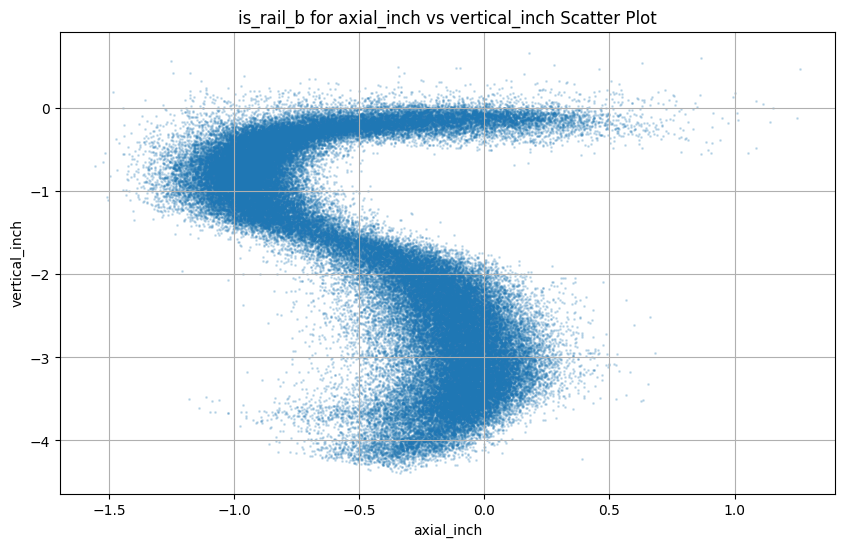

In [1516]:
scatter = df_aug[df_aug['is_rail_b']==1].plot.scatter(x='lateral_inch_rel', y='vertical_inch_rel', s=1, alpha=0.1, figsize=(10, 6))
plt.title('is_rail_b for axial_inch vs vertical_inch Scatter Plot')
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.grid(True)
plt.show()

In [1523]:
df = df_aug

def relative_height_rolling(df, axial_col='axial', vertical_col='vertical', window=0.5):
    """
    For each row, find the minimum vertical_inch within ±window along axial_inch.
    Adds:
      - 'min_in_window'
      - 'relative_vertical_inch' = vertical_inch - min_in_window
    """
    d = df[[axial_col, vertical_col]].copy().sort_values(axial_col).reset_index()
    
    # Use rolling with a custom window based on axial distance
    # Convert to pandas Series for convenience
    ax = d[axial_col]
    vert = d[vertical_col]
    
    # We'll compute min in a sliding window using searchsorted for speed
    min_vals = []
    for i, x in enumerate(ax):
        left = ax.searchsorted(x - window)
        right = ax.searchsorted(x + window, side='right')
        min_vals.append(vert.iloc[left:right].min())
    
    d['min_in_window'] = min_vals
    d['relative_vertical_inch'] = d[vertical_col] - d['min_in_window']
    
    # Merge back to original order
    df = df.copy()
    df['min_in_window'] = d.set_index('index')['min_in_window']
    df['relative_vertical_inch'] = d.set_index('index')['relative_vertical_inch']
    
    return df


df = relative_height_rolling(df, axial_col='axial_inch_round', vertical_col='vertical_inch_round', window=0.5)

In [1519]:
df.rename(columns={'vertical_inch_rel': 'relative_vertical_inch'}, inplace=True)
df.rename(columns={'lateral_inch_rel': 'relative_lateral_inch'}, inplace=True)

In [1520]:
df

Intensity  Original_cloud_index  Classification    lateral  \
0               4                     2             4.0 -44.925005   
1               4                     2             4.0 -44.915330   
2               6                     2             4.0 -44.909792   
3               3                     2             4.0 -44.898397   
4               8                     2             4.0 -44.890612   
...           ...                   ...             ...        ...   
346928          6                     4             NaN  30.973284   
346929         18                     4             NaN  31.022470   
346930         22                     4             NaN  30.930926   
346931          8                     4             NaN  30.958951   
346932          7                     4             NaN  30.943109   

             axial  vertical  lateral_inch   axial_inch  vertical_inch  \
0        90.213491  0.654076   -539.100056  1082.561896       7.848909   
1        90.209737  0.647520   -538.983963  1082.516840       7.770240   
2        90.197784  0.509847   -538.917506  1082.373414       6.118159   
3        90.222283  0.653840   -538.780763  1082.667401       7.846079   
4        90.183980  0.516509   -538.687348  1082.207759       6.198104   
...            ...       ...           ...          ...            ...   
346928   96.587697  0.208996    371.679408  1159.052360       2.507948   
346929  100.096818  0.437129    372.269635  1201.161814       5.245547   
346930   98.097618  0.395188    371.171107  1177.171422       4.742258   
346931   98.254230  0.320579    371.507409  1179.050761       3.846949   
346932   97.977302  0.357562    371.317312  1175.727619       4.290746   

        lateral_inch_round  axial_inch_round  vertical_inch_round  is_rail_a  \
0                -539.1250         1082.5625               7.8750          1   
1                -539.0000         1082.5000               7.7500          1   
2                -538.9375         1082.3750               6.1250          1   
3                -538.7500         1082.6875               7.8750          1   
4                -538.6875         1082.1875               6.1875          1   
...                    ...               ...                  ...        ...   
346928            371.6875         1159.0625               2.5000          0   
346929            372.2500         1201.1875               5.2500          0   
346930            371.1875         1177.1875               4.7500          0   
346931            371.5000         1179.0625               3.8750          0   
346932            371.3125         1175.7500               4.3125          0   

        is_rail_b  relative_vertical_inch  relative_lateral_inch  
0               0                1.314941              -2.226690  
1               0                1.236068              -2.110363  
2               0               -0.416661              -2.043162  
3               0                1.312587              -1.907945  
4               0               -0.337388              -1.812259  
...           ...                     ...                    ...  
346928          1               -2.528359              -0.378001  
346929          1               -0.156261               0.102195  
346930          1               -0.431264              -0.967988  
346931          1               -1.348162              -0.640798  
346932          1               -0.871683              -0.810322  

[313989 rows x 16 columns]

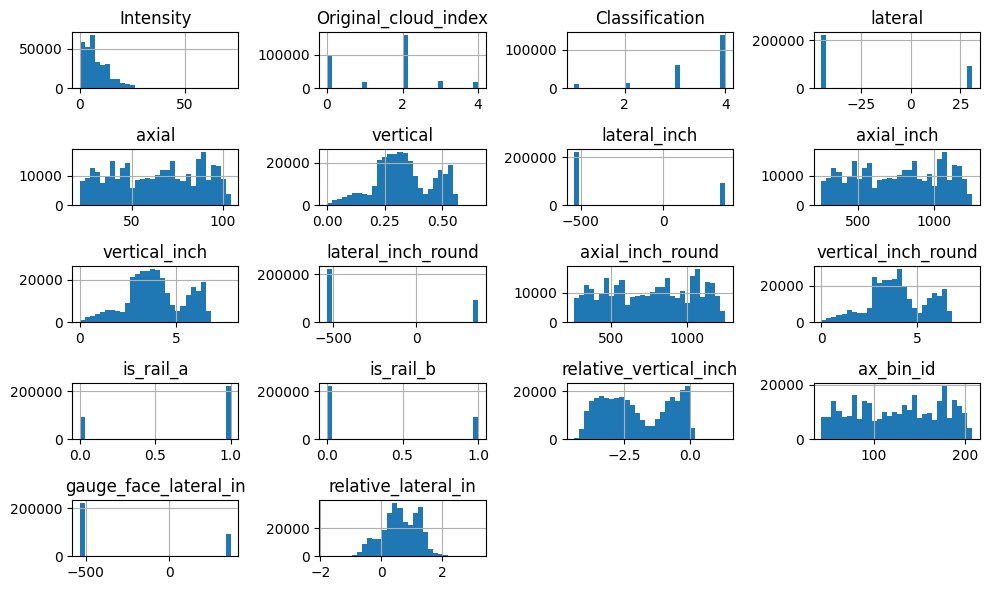

In [ ]:
# Histograms for each column
df.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [1521]:
df

Intensity  Original_cloud_index  Classification    lateral  \
0               4                     2             4.0 -44.925005   
1               4                     2             4.0 -44.915330   
2               6                     2             4.0 -44.909792   
3               3                     2             4.0 -44.898397   
4               8                     2             4.0 -44.890612   
...           ...                   ...             ...        ...   
346928          6                     4             NaN  30.973284   
346929         18                     4             NaN  31.022470   
346930         22                     4             NaN  30.930926   
346931          8                     4             NaN  30.958951   
346932          7                     4             NaN  30.943109   

             axial  vertical  lateral_inch   axial_inch  vertical_inch  \
0        90.213491  0.654076   -539.100056  1082.561896       7.848909   
1        90.209737  0.647520   -538.983963  1082.516840       7.770240   
2        90.197784  0.509847   -538.917506  1082.373414       6.118159   
3        90.222283  0.653840   -538.780763  1082.667401       7.846079   
4        90.183980  0.516509   -538.687348  1082.207759       6.198104   
...            ...       ...           ...          ...            ...   
346928   96.587697  0.208996    371.679408  1159.052360       2.507948   
346929  100.096818  0.437129    372.269635  1201.161814       5.245547   
346930   98.097618  0.395188    371.171107  1177.171422       4.742258   
346931   98.254230  0.320579    371.507409  1179.050761       3.846949   
346932   97.977302  0.357562    371.317312  1175.727619       4.290746   

        lateral_inch_round  axial_inch_round  vertical_inch_round  is_rail_a  \
0                -539.1250         1082.5625               7.8750          1   
1                -539.0000         1082.5000               7.7500          1   
2                -538.9375         1082.3750               6.1250          1   
3                -538.7500         1082.6875               7.8750          1   
4                -538.6875         1082.1875               6.1875          1   
...                    ...               ...                  ...        ...   
346928            371.6875         1159.0625               2.5000          0   
346929            372.2500         1201.1875               5.2500          0   
346930            371.1875         1177.1875               4.7500          0   
346931            371.5000         1179.0625               3.8750          0   
346932            371.3125         1175.7500               4.3125          0   

        is_rail_b  relative_vertical_inch  relative_lateral_inch  
0               0                1.314941              -2.226690  
1               0                1.236068              -2.110363  
2               0               -0.416661              -2.043162  
3               0                1.312587              -1.907945  
4               0               -0.337388              -1.812259  
...           ...                     ...                    ...  
346928          1               -2.528359              -0.378001  
346929          1               -0.156261               0.102195  
346930          1               -0.431264              -0.967988  
346931          1               -1.348162              -0.640798  
346932          1               -0.871683              -0.810322  

[313989 rows x 16 columns]

In [1522]:
df.describe()

Intensity  Original_cloud_index  Classification        lateral  \
count  313989.000000         313989.000000   222197.000000  313989.000000   
mean        7.813398              1.499849        3.470438     -22.604864   
std         5.914595              1.163839        0.809701      34.436124   
min         0.000000              0.000000        1.000000     -44.925005   
25%         3.000000              0.000000        3.000000     -44.758997   
50%         6.000000              2.000000        4.000000     -44.726141   
75%        11.000000              2.000000        4.000000      30.929439   
max        72.000000              4.000000        4.000000      31.114301   

               axial       vertical   lateral_inch     axial_inch  \
count  313989.000000  313989.000000  313989.000000  313989.000000   
mean       63.388633       0.331165    -271.258369     760.663598   
std        23.450068       0.124791     413.233490     281.400818   
min        21.685846       0.000000    -539.100056     260.230147   
25%        42.949663       0.250464    -537.107966     515.395955   
50%        64.945426       0.321213    -536.713692     779.345117   
75%        85.643727       0.430714     371.153273    1027.724720   
max       104.307603       0.654076     373.371617    1251.691235   

       vertical_inch  lateral_inch_round  axial_inch_round  \
count  313989.000000       313989.000000     313989.000000   
mean        3.973982         -271.258425        760.663622   
std         1.497496          413.233531        281.400854   
min         0.000000         -539.125000        260.250000   
25%         3.005567         -537.125000        515.375000   
50%         3.854562         -536.687500        779.375000   
75%         5.168567          371.125000       1027.750000   
max         7.848909          373.375000       1251.687500   

       vertical_inch_round      is_rail_a      is_rail_b  \
count        313989.000000  313989.000000  313989.000000   
mean              3.974016       0.707659       0.292341   
std               1.497593       0.454839       0.454839   
min               0.000000       0.000000       0.000000   
25%               3.000000       0.000000       0.000000   
50%               3.875000       1.000000       0.000000   
75%               5.187500       1.000000       1.000000   
max               7.875000       1.000000       1.000000   

       relative_vertical_inch  relative_lateral_inch  
count           313989.000000          313989.000000  
mean                -2.009796              -0.247949  
std                  1.269532               0.449550  
min                 -4.387518              -2.226690  
25%                 -3.128982              -0.516710  
50%                 -2.241402              -0.333843  
75%                 -0.746426              -0.030369  
max                  1.314941               2.259513

In [ ]:
df.to_csv('data/df_processed.csv', index=False)